# **Trading Project**

## **Step 1: Loading Libraries**

In [2]:
# !pip install neuralprophet

In [3]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
import seaborn as sns

## **Step 2: Data Loading**

In [4]:
data = pd.read_csv('combined_data.csv')
data.head()

,Time,Interval Start,Interval End,Location,Location Type,Market,SPP
0,2024-07-13 00:00:00-05:00,2024-07-13 00:00:00-05:00,2024-07-13 01:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,15.82
1,2024-07-13 01:00:00-05:00,2024-07-13 01:00:00-05:00,2024-07-13 02:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,14.76
2,2024-07-13 02:00:00-05:00,2024-07-13 02:00:00-05:00,2024-07-13 03:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,14.51
3,2024-07-13 03:00:00-05:00,2024-07-13 03:00:00-05:00,2024-07-13 04:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,15.07
4,2024-07-13 04:00:00-05:00,2024-07-13 04:00:00-05:00,2024-07-13 05:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,14.22


## **Step 3: Data Preprocessing**

In [5]:
data.isnull().sum()

Time              0
Interval Start    0
Interval End      0
Location          0
Location Type     0
Market            0
SPP               0
dtype: int64

In [6]:
# Convert time columns to datetime
data['Time'] = pd.to_datetime(data['Time'])
# Separate Day-Ahead and Real-Time data
da_data = data[data['Market'] == 'Day_Ahead']
rt_data = data[data['Market'] == 'Real_Time']

In [7]:
da_data.rename(columns={'Time': 'ds', 'SPP': 'y'}, inplace=True)
rt_data.rename(columns={'Time': 'ds', 'SPP': 'y'}, inplace=True)


WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/943443180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_data.rename(columns={'Time': 'ds', 'SPP': 'y'}, inplace=True)

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/943443180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_data.rename(columns={'Time': 'ds', 'SPP': 'y'}, inplace=True)



In [8]:
print("Day-Ahead Data",da_data.head(5))
print("Real-Time Data",rt_data.head(5))

Day-Ahead Data                          ds             Interval Start  \
0 2024-07-13 00:00:00-05:00  2024-07-13 00:00:00-05:00   
1 2024-07-13 01:00:00-05:00  2024-07-13 01:00:00-05:00   
2 2024-07-13 02:00:00-05:00  2024-07-13 02:00:00-05:00   
3 2024-07-13 03:00:00-05:00  2024-07-13 03:00:00-05:00   
4 2024-07-13 04:00:00-05:00  2024-07-13 04:00:00-05:00   

                Interval End      Location  Location Type     Market      y  
0  2024-07-13 01:00:00-05:00  MOZART_WIND1  Resource Node  Day_Ahead  15.82  
1  2024-07-13 02:00:00-05:00  MOZART_WIND1  Resource Node  Day_Ahead  14.76  
2  2024-07-13 03:00:00-05:00  MOZART_WIND1  Resource Node  Day_Ahead  14.51  
3  2024-07-13 04:00:00-05:00  MOZART_WIND1  Resource Node  Day_Ahead  15.07  
4  2024-07-13 05:00:00-05:00  MOZART_WIND1  Resource Node  Day_Ahead  14.22  
Real-Time Data                            ds             Interval Start  \
528 2024-08-04 23:45:00-05:00  2024-08-04 23:45:00-05:00   
553 2024-08-05 00:00:00-05:00  20

## **Step 4: EDA**

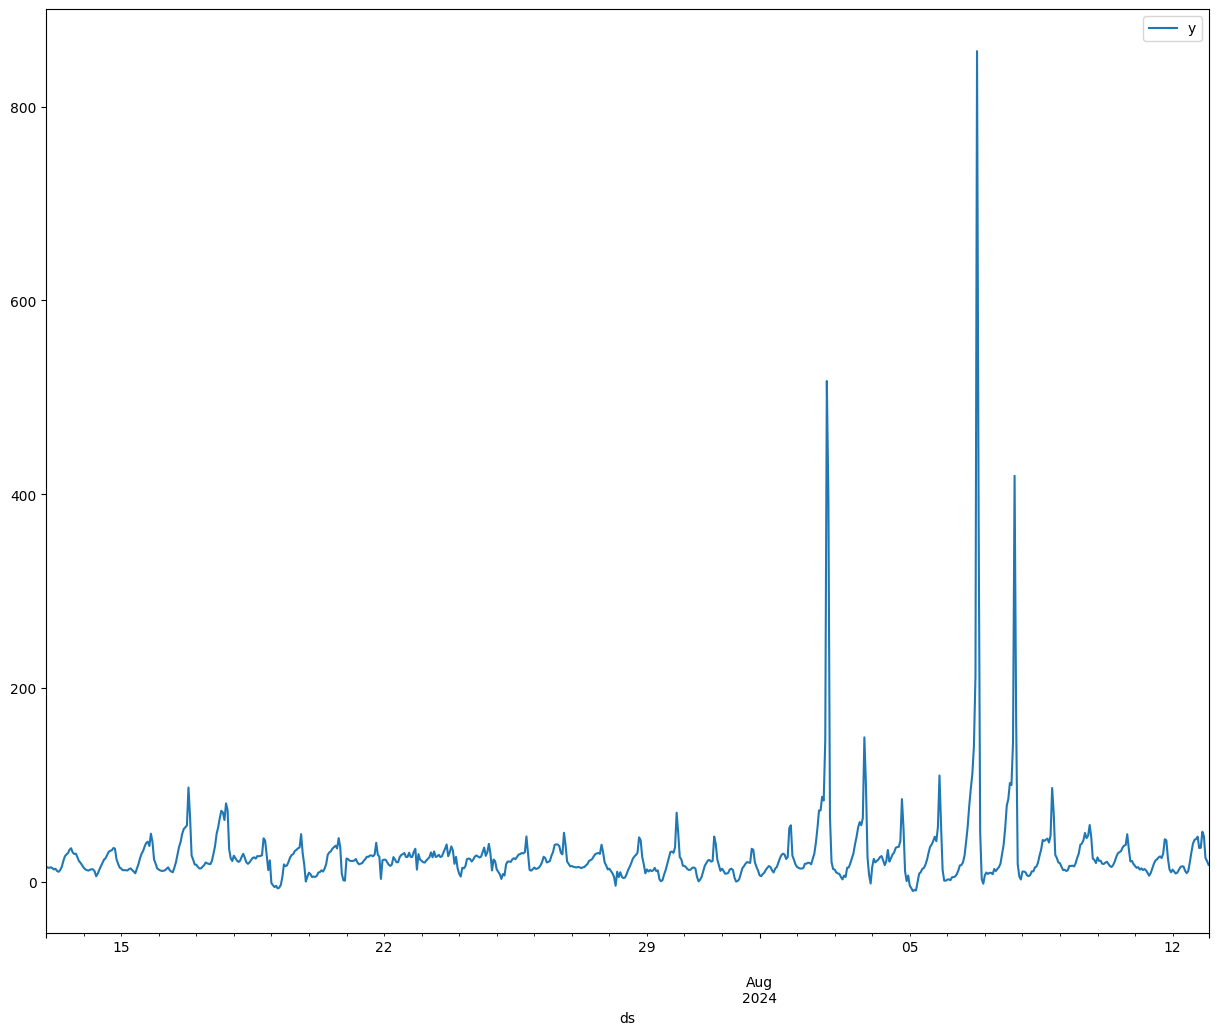

In [9]:
da_plot = da_data.set_index('ds').plot(figsize=(15, 12))


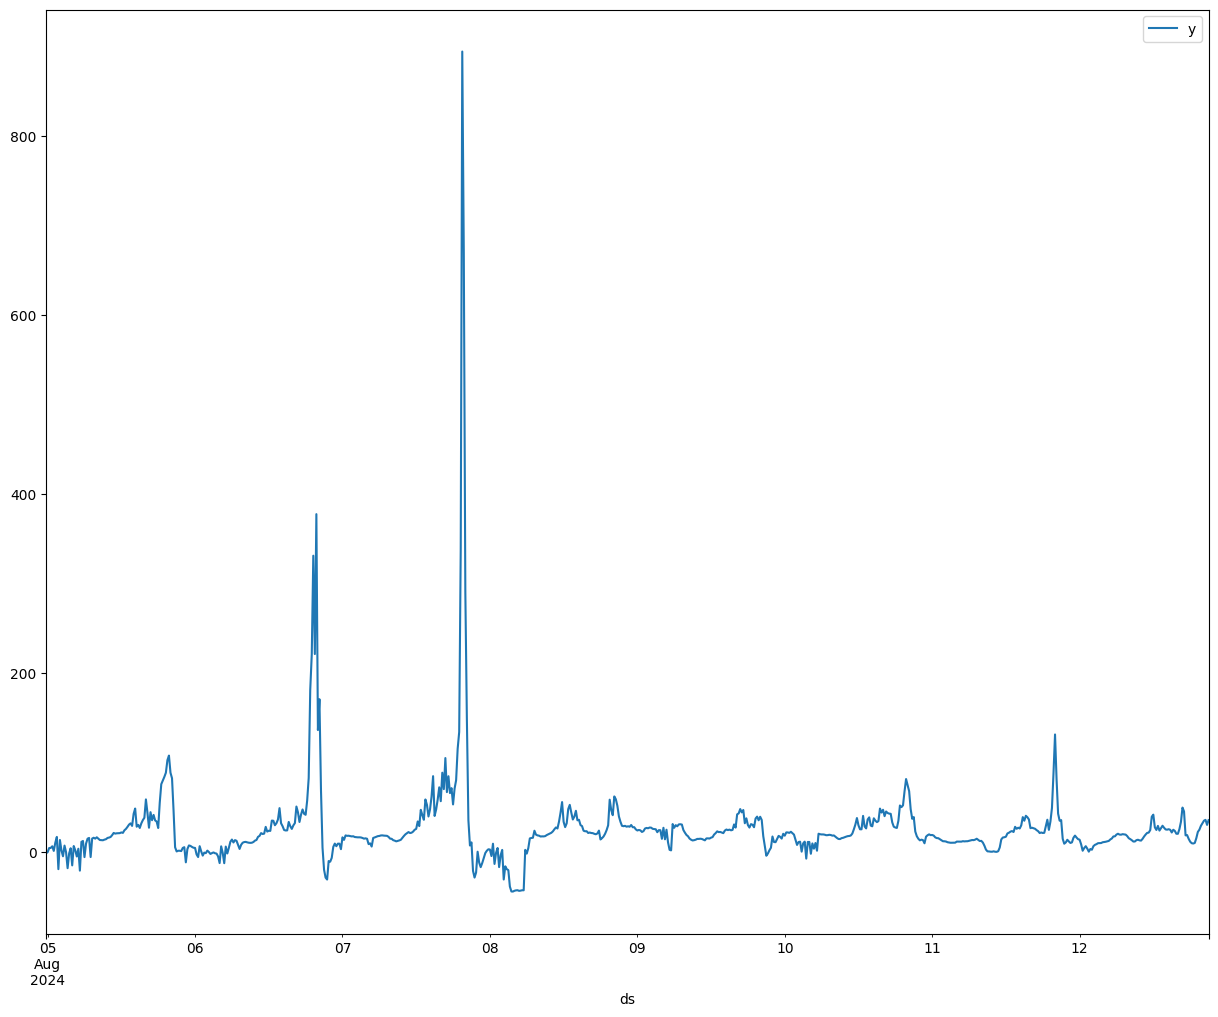

In [10]:
rt_plot = rt_data.set_index('ds').plot(figsize=(15, 12))

**Visualizing Day-Ahead & Real-Time Prices**

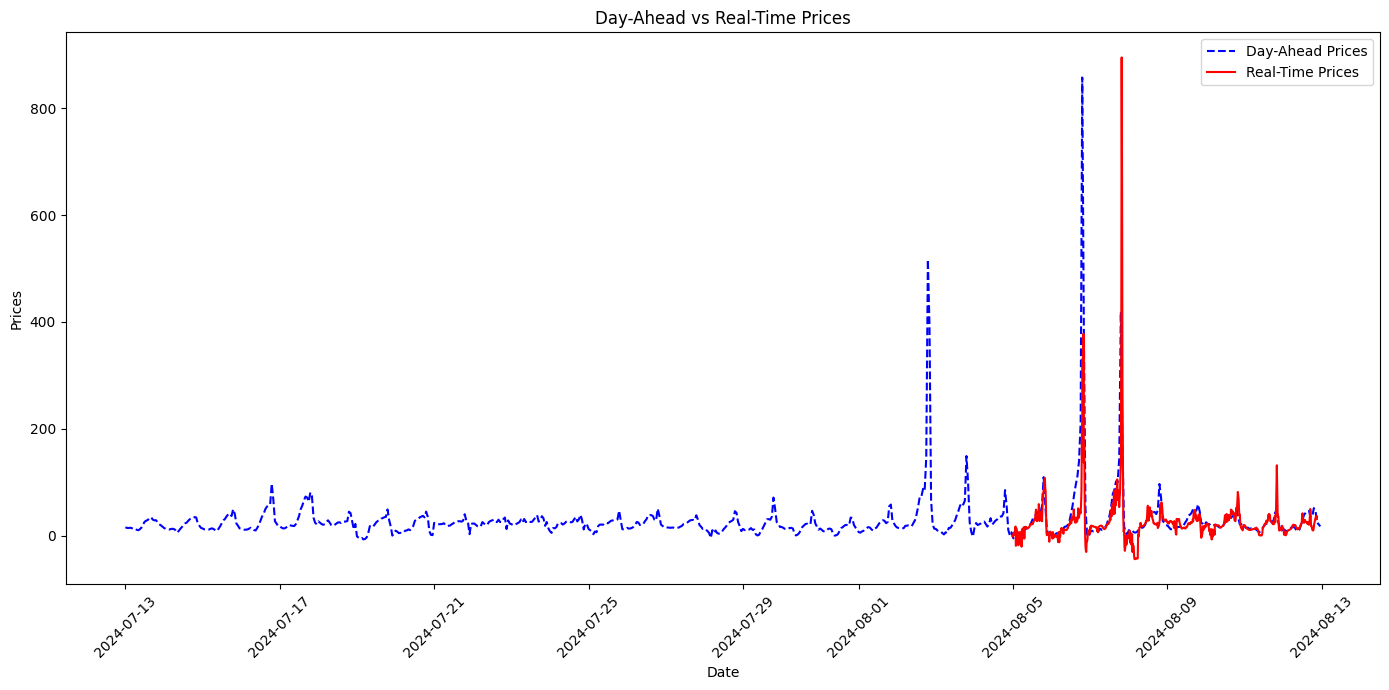

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(da_data['ds'], da_data['y'], label='Day-Ahead Prices', color='blue', linestyle='--')
plt.plot(rt_data['ds'], rt_data['y'], label='Real-Time Prices', color='red', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Day-Ahead vs Real-Time Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/3799563114.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  da_data['month'] = da_data['ds'].dt.to_period('M')

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/3799563114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_data['month'] = da_data['ds'].dt.to_period('M')



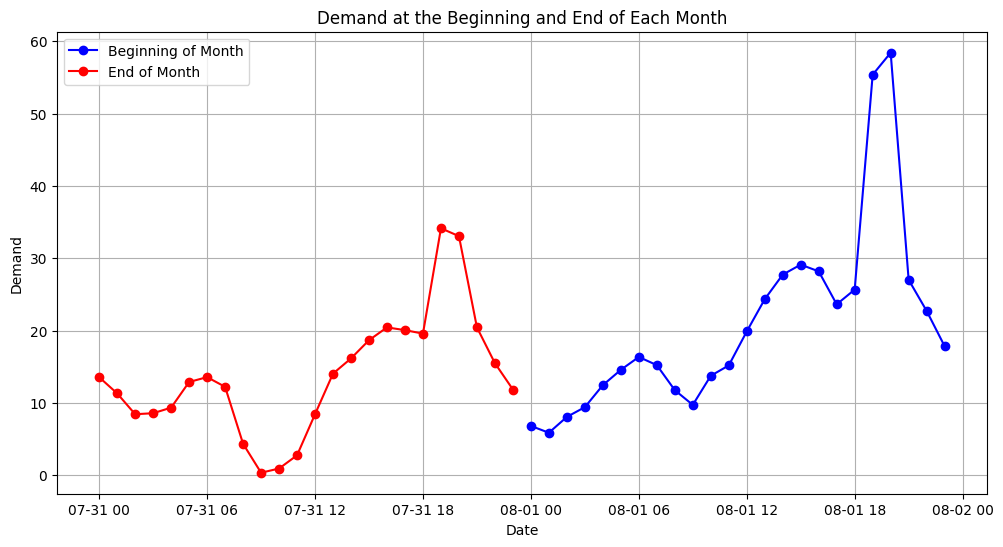

In [12]:
da_data['month'] = da_data['ds'].dt.to_period('M')
beginning_of_month = da_data[da_data['ds'].dt.day == 1]
end_of_month = da_data[da_data['ds'].dt.is_month_end]
plt.figure(figsize=(12, 6))

# Plot beginning of month
plt.plot(beginning_of_month['ds'], beginning_of_month['y'], 'o-', label='Beginning of Month', color='blue')

# Plot end of month
plt.plot(end_of_month['ds'], end_of_month['y'], 'o-', label='End of Month', color='red')

plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand at the Beginning and End of Each Month')
plt.legend()
plt.grid(True)
plt.show()

plot to see average values on weekends and weekdays

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/3706367665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_data['day_of_week'] = da_data['ds'].dt.day_name()

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/3706367665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_data['day_type'] = da_data['day_of_week'].apply(lambda x:'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')



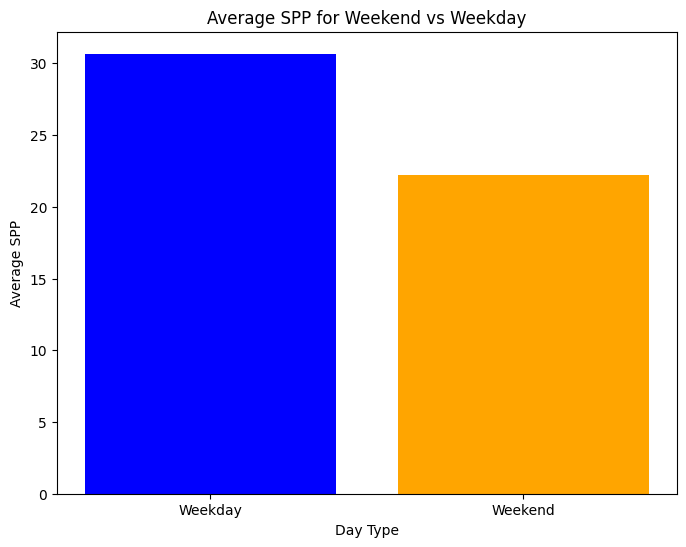

In [13]:
da_data['day_of_week'] = da_data['ds'].dt.day_name()
da_data['day_type'] = da_data['day_of_week'].apply(lambda x:'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')
grouped_day_of_week = da_data.groupby('day_type')['y'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.bar(grouped_day_of_week['day_type'],grouped_day_of_week['y'],color=['blue','orange'])
plt.xlabel('Day Type')
plt.ylabel('Average SPP')
plt.title('Average SPP for Weekend vs Weekday')
plt.show()

Plot to see trend in weekdays and weekends

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/1925487107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_data['day_of_week'] = da_data['ds'].dt.day_name()

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/1925487107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_data['day_type'] = da_data['day_of_week'].apply(lambda x:'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')



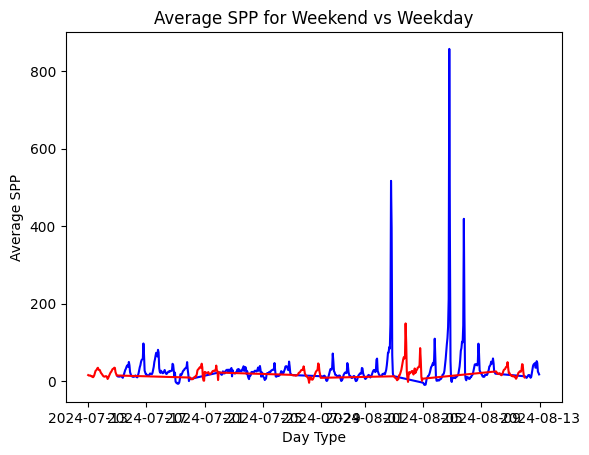

In [14]:
da_data['day_of_week'] = da_data['ds'].dt.day_name()
da_data['day_type'] = da_data['day_of_week'].apply(lambda x:'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')
da_weekday = da_data[da_data['day_type'] == 'Weekday']
da_weekend = da_data[da_data['day_type'] == 'Weekend']

plt.plot(da_weekday['ds'],da_weekday['y'],color='blue')
plt.plot(da_weekend['ds'],da_weekend['y'],color='red')
plt.xlabel('Day Type')
plt.ylabel('Average SPP')
plt.title('Average SPP for Weekend vs Weekday')
plt.show()


July 4th Demand

In [15]:
holiday = '07-04'




**Price Distribution**

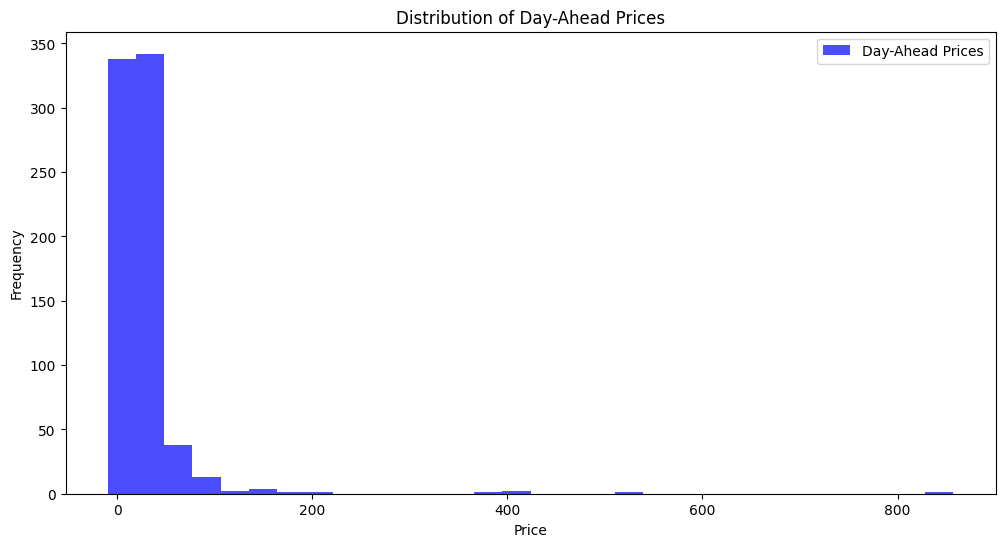

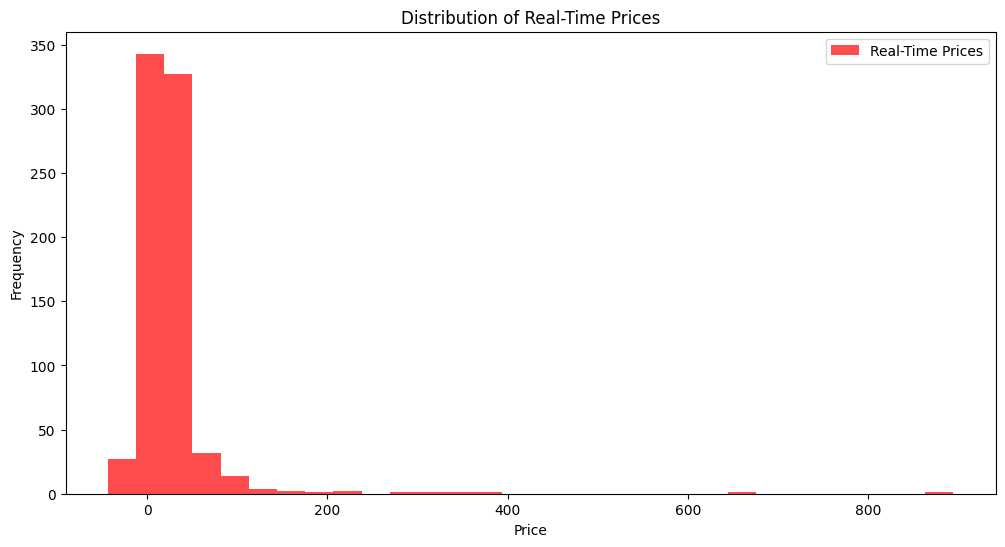

In [16]:
# Distribution of Day-Ahead Prices
plt.figure(figsize=(12, 6))
plt.hist(da_data['y'], bins=30, color='blue', alpha=0.7, label='Day-Ahead Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Day-Ahead Prices')
plt.legend()
plt.show()

# Distribution of Real-Time Prices
plt.figure(figsize=(12, 6))
plt.hist(rt_data['y'], bins=30, color='red', alpha=0.7, label='Real-Time Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Real-Time Prices')
plt.legend()
plt.show()


**Trend Analysis**

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/2238843286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_data['Rolling_Mean'] = da_data['y'].rolling(window=24).mean()  # 24-hour rolling window

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/2238843286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_data['Rolling_Std'] = da_data['y'].rolling(window=24).std()



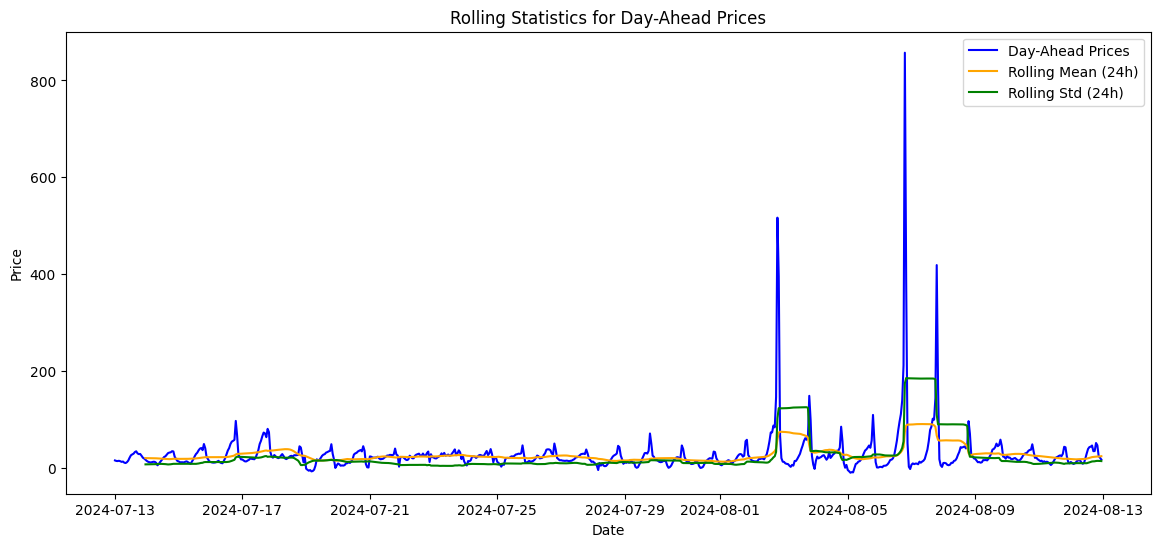

In [17]:
# Rolling mean and standard deviation for Day-Ahead Prices
da_data['Rolling_Mean'] = da_data['y'].rolling(window=24).mean()  # 24-hour rolling window
da_data['Rolling_Std'] = da_data['y'].rolling(window=24).std()

plt.figure(figsize=(14, 6))
plt.plot(da_data['ds'], da_data['y'], label='Day-Ahead Prices', color='blue')
plt.plot(da_data['ds'], da_data['Rolling_Mean'], label='Rolling Mean (24h)', color='orange')
plt.plot(da_data['ds'], da_data['Rolling_Std'], label='Rolling Std (24h)', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rolling Statistics for Day-Ahead Prices')
plt.legend()
plt.show()

# Repeat the same for Real-Time Prices if needed


WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/2603906659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_data['Rolling_Mean'] = rt_data['y'].rolling(window=24).mean()  # 24-hour rolling window

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_60352/2603906659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_data['Rolling_Std'] = rt_data['y'].rolling(window=24).std()



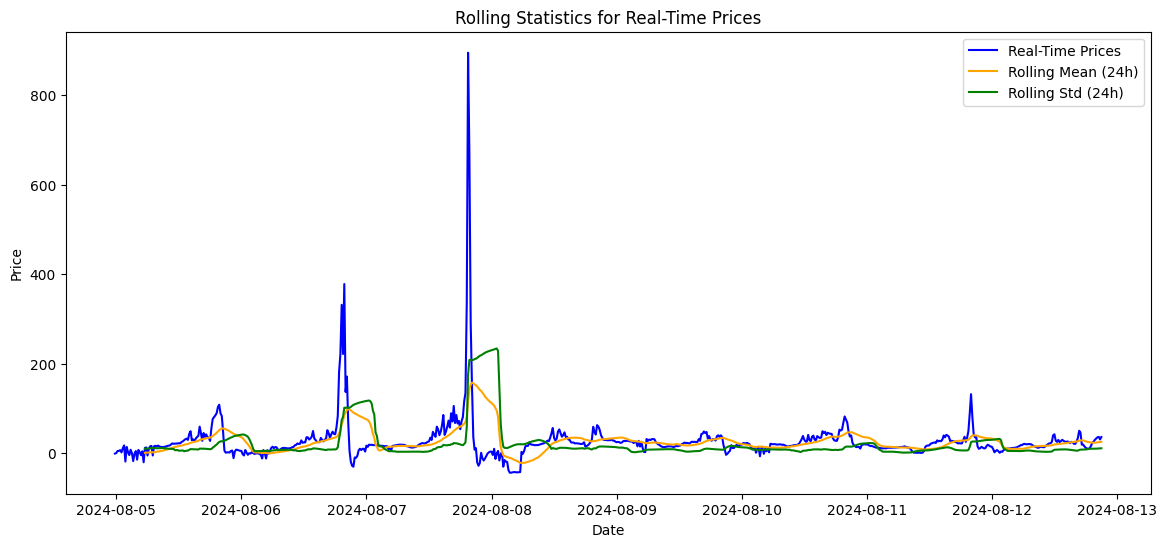

In [18]:
# Rolling mean and standard deviation for Day-Ahead Prices
rt_data['Rolling_Mean'] = rt_data['y'].rolling(window=24).mean()  # 24-hour rolling window
rt_data['Rolling_Std'] = rt_data['y'].rolling(window=24).std()

plt.figure(figsize=(14, 6))
plt.plot(rt_data['ds'], rt_data['y'], label='Real-Time Prices', color='blue')
plt.plot(rt_data['ds'], rt_data['Rolling_Mean'], label='Rolling Mean (24h)', color='orange')
plt.plot(rt_data['ds'], rt_data['Rolling_Std'], label='Rolling Std (24h)', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rolling Statistics for Real-Time Prices')
plt.legend()
plt.show()

# Repeat the same for Real-Time Prices if needed


In [19]:
# from sklearn.preprocessing import LabelEncoder

# da_data['day_of_week_cat'] = LabelEncoder().fit_transform(da_data['day_of_week'])
# da_data


In [20]:
da_data = da_data[['ds','y']]
rt_data = rt_data[['ds','y']]

Building Neural Prophet

In [21]:
from neuralprophet import NeuralProphet
model_da = NeuralProphet(trend_reg=10, epochs=150,learning_rate=0.01,batch_size=32, daily_seasonality=True)
train_da_data, test_da_data = model_da.split_df(da_data, valid_p=0.2)

# Train the model for Day-Ahead
metrics = model_da.fit(train_da_data, freq='H')
# Generate a forecastpr
future_da = model_da.make_future_dataframe(test_da_data, periods=0, n_historic_predictions=True)
print("Future Da",future_da)
forecast_da = model_da.predict(future_da)
print("Forecast Da",forecast_da)



INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.866% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as h
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3

Training: 0it [00:00, ?it/s]

WARNING - (NP.data.splitting._make_future_dataframe) - Not extending df into future as no periods specified. You can skip this and predict directly instead.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.324% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/

Future Da                      ds       y
0   2024-08-07 01:00:00  382.97
1   2024-08-07 02:00:00   51.79
2   2024-08-07 03:00:00    2.75
3   2024-08-07 04:00:00   -1.91
4   2024-08-07 05:00:00    6.95
..                  ...     ...
143 2024-08-13 00:00:00   51.76
144 2024-08-13 01:00:00   47.09
145 2024-08-13 02:00:00   24.72
146 2024-08-13 03:00:00   21.50
147 2024-08-13 04:00:00   17.59

[148 rows x 2 columns]


Predicting: 19it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Forecast Da                      ds       y      yhat1      trend  season_weekly  \
0   2024-08-07 01:00:00  382.97  60.673218  35.985992       3.689816   
1   2024-08-07 02:00:00   51.79  42.870716  36.108547       3.747321   
2   2024-08-07 03:00:00    2.75  29.955246  36.231113       3.779715   
3   2024-08-07 04:00:00   -1.91  29.512066  36.353676       3.784708   
4   2024-08-07 05:00:00    6.95  31.563366  36.476246       3.762291   
..                  ...     ...        ...        ...            ...   
143 2024-08-13 00:00:00   51.76  78.681351  53.512432      -2.409925   
144 2024-08-13 01:00:00   47.09  72.326080  53.634995      -2.181770   
145 2024-08-13 02:00:00   24.72  54.849754  53.757557      -1.939190   
146 2024-08-13 03:00:00   21.50  42.278790  53.880123      -1.682253   
147 2024-08-13 04:00:00   17.59  42.000488  54.002678      -1.415923   

     season_daily  
0       20.997416  
1        3.014852  
2      -10.055584  
3      -10.626319  
4       -8.675169  
.. 

In [22]:
# future_da['day_of_week'] = LabelEncoder().fit_transform(future_da['ds'].dt.strftime('%A'))
# print(future_da)


In [23]:
model_da.plot(forecast_da)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '2c1216be-a251-4535-b3bf-7fb9af635bd6',
              'x': array([datetime.datetime(2024, 8, 7, 1, 0),
                          datetime.datetime(2024, 8, 7, 2, 0),
                          datetime.datetime(2024, 8, 7, 3, 0),
                          datetime.datetime(2024, 8, 7, 4, 0),
                          datetime.datetime(2024, 8, 7, 5, 0),
                          datetime.datetime(2024, 8, 7, 6, 0),
                          datetime.datetime(2024, 8, 7, 7, 0),
                          datetime.datetime(2024, 8, 7, 8, 0),
                          datetime.datetime(2024, 8, 7, 9, 0),
                          datetime.datetime(2024, 8, 7, 10, 0),
                          datetime.datetime(2024, 8, 7, 11, 0),
                       

In [24]:

print(forecast_da)

                     ds       y      yhat1      trend  season_weekly  \
0   2024-08-07 01:00:00  382.97  60.673218  35.985992       3.689816   
1   2024-08-07 02:00:00   51.79  42.870716  36.108547       3.747321   
2   2024-08-07 03:00:00    2.75  29.955246  36.231113       3.779715   
3   2024-08-07 04:00:00   -1.91  29.512066  36.353676       3.784708   
4   2024-08-07 05:00:00    6.95  31.563366  36.476246       3.762291   
..                  ...     ...        ...        ...            ...   
143 2024-08-13 00:00:00   51.76  78.681351  53.512432      -2.409925   
144 2024-08-13 01:00:00   47.09  72.326080  53.634995      -2.181770   
145 2024-08-13 02:00:00   24.72  54.849754  53.757557      -1.939190   
146 2024-08-13 03:00:00   21.50  42.278790  53.880123      -1.682253   
147 2024-08-13 04:00:00   17.59  42.000488  54.002678      -1.415923   

     season_daily  
0       20.997416  
1        3.014852  
2      -10.055584  
3      -10.626319  
4       -8.675169  
..            .

In [168]:
# import numpy as np
# train_data['y'] = np.log1p(train_data['y'])
# test_data['y'] = np.log1p(test_data['y'])

In [25]:
model = NeuralProphet(epochs=450,learning_rate=0.001,
    batch_size=32)
# # Train the model for Real-Time
train_rtdata, test_rtdata = model.split_df(rt_data, valid_p=0.2)
metrics_rt = model.fit(train_rtdata)

# Generate a forecast for Real-Time
future_rt = model.make_future_dataframe(test_rtdata, periods=0, n_historic_predictions=True)
forecast_rt = model.predict(future_rt)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.868% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 15min
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use 

Training: 0it [00:00, ?it/s]

WARNING - (NP.data.splitting._make_future_dataframe) - Not extending df into future as no periods specified. You can skip this and predict directly instead.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.338% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Predicting: 19it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [26]:
model.plot(forecast_rt)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '14688967-8efa-4f58-928b-fbd3e088c756',
              'x': array([datetime.datetime(2024, 8, 11, 12, 30),
                          datetime.datetime(2024, 8, 11, 12, 45),
                          datetime.datetime(2024, 8, 11, 13, 0),
                          datetime.datetime(2024, 8, 11, 13, 15),
                          datetime.datetime(2024, 8, 11, 13, 30),
                          datetime.datetime(2024, 8, 11, 13, 45),
                          datetime.datetime(2024, 8, 11, 14, 0),
                          datetime.datetime(2024, 8, 11, 14, 15),
                          datetime.datetime(2024, 8, 11, 14, 30),
                          datetime.datetime(2024, 8, 11, 14, 45),
                          datetime.datetime(2024, 8, 11, 15,

In [27]:
print(forecast_rt)

                     ds      y      yhat1      trend  season_daily
0   2024-08-11 12:30:00  13.91  24.119167  26.916203     -2.797038
1   2024-08-11 12:45:00  12.70  23.924343  26.938236     -3.013894
2   2024-08-11 13:00:00  12.89  23.020779  26.960270     -3.939493
3   2024-08-11 13:15:00  11.00  21.752140  26.982304     -5.230169
4   2024-08-11 13:30:00   7.55  20.255337  27.004345     -6.749006
..                  ...    ...        ...        ...           ...
146 2024-08-13 01:00:00  32.64  62.436008  30.133572     32.302429
147 2024-08-13 01:15:00  35.45  55.895168  30.155613     25.739552
148 2024-08-13 01:30:00  36.35  48.996639  30.177647     18.818995
149 2024-08-13 01:45:00  30.73  41.491131  30.199680     11.291456
150 2024-08-13 02:00:00  36.06  34.171070  30.221722      3.949345

[151 rows x 5 columns]


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test_da_data['y'], forecast_da['yhat1'])
print(f'Mean Absolute Error (MAE) for Day-Ahead: {mae}')

# Calculate MSE
mse = mean_squared_error(test_da_data['y'], forecast_da['yhat1'])
print(f'Mean Squared Error (MSE) for Day-Ahead: {mse}')

# Calculate RMSE
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE) for Day-Ahead: {rmse}')


Mean Absolute Error (MAE) for Day-Ahead: 27.08058754688985
Mean Squared Error (MSE) for Day-Ahead: 2191.91323477575
Root Mean Squared Error (RMSE) for Day-Ahead: 46.81787302703691


In [173]:
# forecast_rt['yhat1'] = np.expm1(forecast_rt['yhat1'])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test_rtdata['y'], forecast_rt['yhat1'])
print(f'Mean Absolute Error (MAE) for Real-Time: {mae}')

# Calculate MSE
mse = mean_squared_error(test_rtdata['y'], forecast_rt['yhat1'])
print(f'Mean Squared Error (MSE)for Real-Time: {mse}')

# Calculate RMSE
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE)for Real-Time: {rmse}')


Mean Absolute Error (MAE) for Real-Time: 14.09453807199238
Mean Squared Error (MSE)for Real-Time: 346.46971455070144
Root Mean Squared Error (RMSE)for Real-Time: 18.613696960859265


In [30]:
# Create a future dataframe for the next 24 hours
future_da = model_da.make_future_dataframe(da_data, periods=24)

# Generate predictions
forecast_da = model_da.predict(future_da)

# Display the forecast
print(forecast_da[['ds', 'yhat1']].tail(24))


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.866% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1173: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to majo

Predicting: 19it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


                    ds      yhat1
0  2024-08-13 05:00:00  44.333546
1  2024-08-13 06:00:00  42.617722
2  2024-08-13 07:00:00  40.823917
3  2024-08-13 08:00:00  42.285030
4  2024-08-13 09:00:00  44.317478
5  2024-08-13 10:00:00  45.428608
6  2024-08-13 11:00:00  47.494518
7  2024-08-13 12:00:00  49.195621
8  2024-08-13 13:00:00  47.836288
9  2024-08-13 14:00:00  46.758213
10 2024-08-13 15:00:00  50.077686
11 2024-08-13 16:00:00  55.783936
12 2024-08-13 17:00:00  59.405434
13 2024-08-13 18:00:00  63.028305
14 2024-08-13 19:00:00  69.498848
15 2024-08-13 20:00:00  73.834991
16 2024-08-13 21:00:00  72.003395
17 2024-08-13 22:00:00  71.613457
18 2024-08-13 23:00:00  79.964813
19 2024-08-14 00:00:00  87.680344
20 2024-08-14 01:00:00  81.193489
21 2024-08-14 02:00:00  63.525810
22 2024-08-14 03:00:00  50.522617
23 2024-08-14 04:00:00  50.167587


In [31]:
# Create a future dataframe for the next 24 hours
future_rt = model.make_future_dataframe(rt_data, periods=24)

# Generate predictions
forecast_rt = model.predict(future_rt)
forecast_da = forecast_da[['ds', 'yhat1']].tail(24)
# Display the forecast
forecast_rt = forecast_rt[['ds', 'yhat1']].tail(24)


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.868% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequ

Predicting: 19it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [33]:
forecast_rt

,ds,yhat1
0,2024-08-13 02:15:00,26.009090
1,2024-08-13 02:30:00,19.922688
2,2024-08-13 02:45:00,15.196400
3,2024-08-13 03:00:00,11.565426
4,2024-08-13 03:15:00,9.933571
5,2024-08-13 03:30:00,9.863220
6,2024-08-13 03:45:00,11.295601
7,2024-08-13 04:00:00,13.575897
8,2024-08-13 04:15:00,16.724712
9,2024-08-13 04:30:00,19.416225


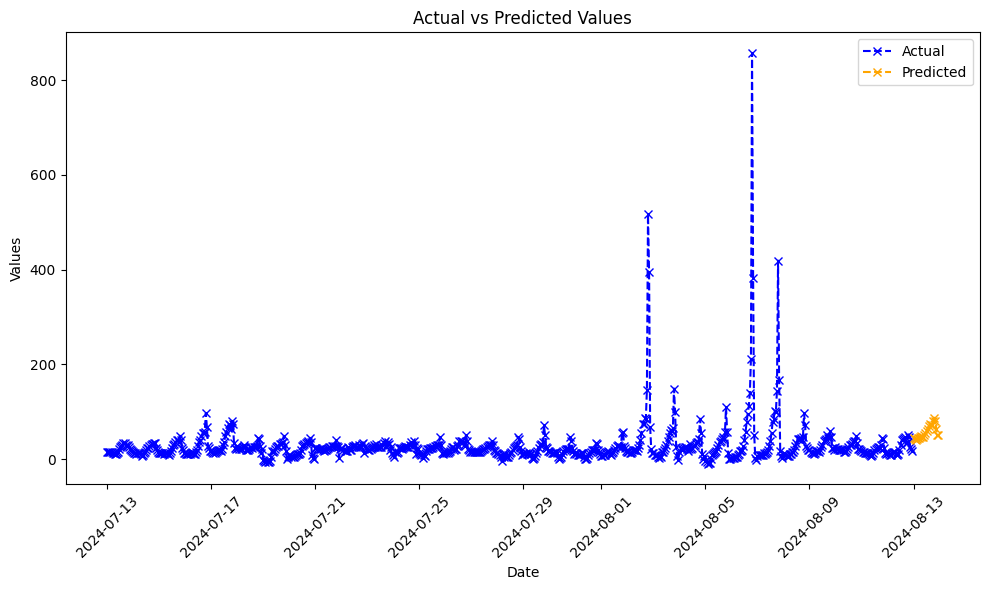

In [34]:
import matplotlib.pyplot as plt

# Assuming forecast_rt is a DataFrame with columns: 'ds', 'yhat1', 'y'

# Plot actual values (y) and predicted values (yhat1)
plt.figure(figsize=(10, 6))


plt.plot(da_data['ds'], da_data['y'], label='Actual', color='blue', linestyle='--', marker='x')
# Plot predicted values
plt.plot(forecast_da['ds'], forecast_da['yhat1'], label='Predicted', color='orange', linestyle='--', marker='x')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [35]:
forecast_rt

,ds,yhat1
0,2024-08-13 02:15:00,26.009090
1,2024-08-13 02:30:00,19.922688
2,2024-08-13 02:45:00,15.196400
3,2024-08-13 03:00:00,11.565426
4,2024-08-13 03:15:00,9.933571
5,2024-08-13 03:30:00,9.863220
6,2024-08-13 03:45:00,11.295601
7,2024-08-13 04:00:00,13.575897
8,2024-08-13 04:15:00,16.724712
9,2024-08-13 04:30:00,19.416225


In [44]:
forecast_rt['y'] = forecast_rt['yhat1']
forecast_da['y'] = forecast_da['yhat1']

KeyError: 'y'

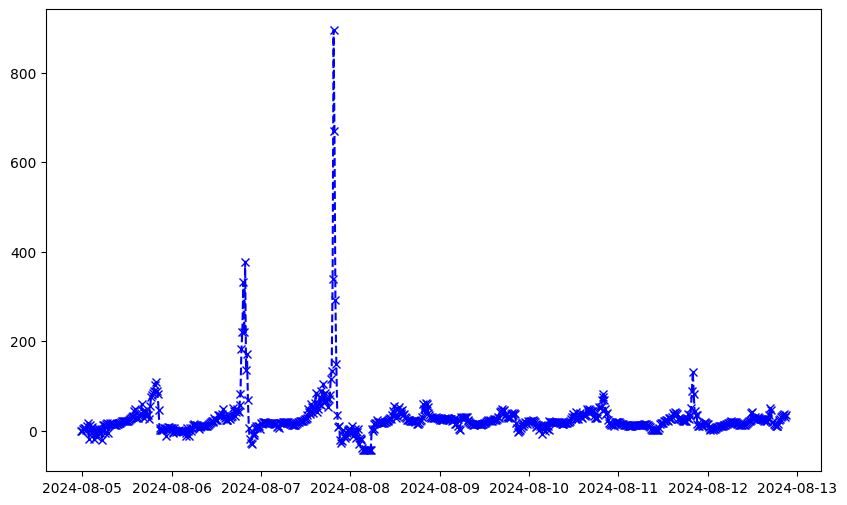

In [36]:
import matplotlib.pyplot as plt

# Assuming forecast_rt is a DataFrame with columns: 'ds', 'yhat1', 'y'

# Plot actual values (y) and predicted values (yhat1)
plt.figure(figsize=(10, 6))

# Plot predicted values
plt.plot(rt_data['ds'], rt_data['y'], label='Actual', color='blue', linestyle='--', marker='x')
plt.plot(forecast_rt['ds'], forecast_rt['y'], label='Predicted', color='orange', linestyle='--', marker='x')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [51]:
forecast_da.to_csv('da_forecast.csv', index=False)
forecast_rt.to_csv('rt_forecast.csv', index=False)
